In [1]:
import pandas as pd
import numpy as np
import investpy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 5]

In [18]:
def getMovingAverage(close, days):
    ema = []
    ema.append(close[0])
    smooth = 2/(days+1) 
    for i in range(1,len(close)):
        ema.append(close[i] * smooth + ema[i-1] * (1-smooth))
    return ema

In [117]:
stocks = investpy.get_stocks_list()
def getInfo(stock, country, from_date, to_date, interval):
    stock = investpy.get_stock_historical_data(stock=stock, country=country, from_date=from_date, to_date=to_date)
        
    fig, chart = plt.subplots()
    chart.plot(stock['High'], label="high")
    chart.plot(stock['Low'], label="low")
    chart.plot(stock['Open'], label="open")
    chart.legend(loc="lower right")
    plt.show()
    
    ##for moving average
    fig, ma_chart = plt.subplots()
    sma_stock = stock['Close'].groupby(np.arange(len(stock['Close']))//interval).mean()
    ema_stock = getMovingAverage(sma_stock, interval)
    ema_stock = pd.DataFrame(data = ema_stock)
    ma_chart.plot(sma_stock, label="SMA" + str(interval))
    ma_chart.plot(ema_stock, label="EMA" + str(interval))
    ma_chart.legend(loc = "lower right")
    plt.show()

##if stock info is not indexed
def searchAndGetInfo(stock, country, from_date, to_date, interval):
    search_results = investpy.search_quotes(text = stock, countries=[country], n_results=1)
    stock = search_results[0].retrieve_historical_data(from_date=from_date, to_date=to_date)

    
    fig, chart = plt.subplots()
    chart.plot(stock['High'], label="high")
    chart.plot(stock['Low'], label="low")
    chart.plot(stock['Open'], label="open")
    chart.legend(loc="lower right")
    plt.show()
    
    ##for moving average
    fig, ma_chart = plt.subplots()
    sma_stock = stock['Close'].groupby(np.arange(len(stock['Close']))//interval).mean()
    ema_stock = getMovingAverage(sma_stock, interval)
    ema_stock = pd.DataFrame(data = ema_stock)
    ma_chart.plot(sma_stock, label="SMA" + str(interval))
    ma_chart.plot(ema_stock, label="EMA" + str(interval))
    ma_chart.legend(loc = "lower right")
    plt.show()

    
#test for fill in the gap in intervals
def test(stock, country, from_date, to_date, interval):
    stock = investpy.get_stock_historical_data(stock=stock, country=country, from_date=from_date, to_date=to_date)

    ##for moving average
    fig, ma_chart = plt.subplots()
    sma_stock = stock['Close'].groupby(np.arange(len(stock['Close']))//interval).mean()
    ema_stock = getMovingAverage(sma_stock, interval)
    
    for i in range(0,len(stock['Close'])): #loop til end element of close value of stock
        for a in range(i+1, interval+i):
            if interval > len(stock['Close']):
                break
            else:
                sma_stock.loc[a] = [sma_stock[i]]
                sma_stock.index = sma_stock.index + 1  # shifting index
                sma_stock = sma_stock.sort_index()  # sorting by index
                


ValueError: setting an array element with a sequence.

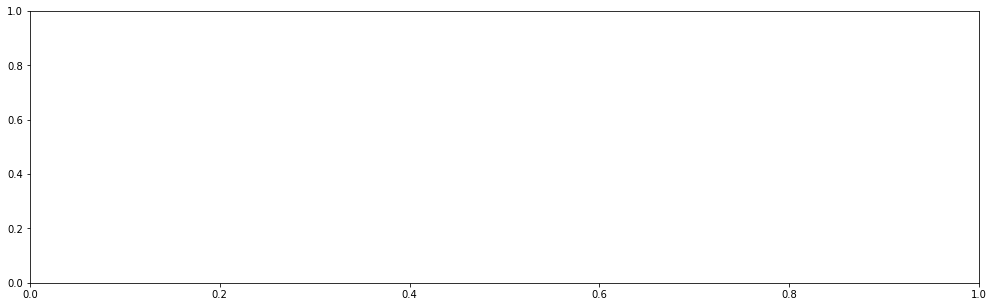

In [118]:
test('FMETF','philippines', '13/2/2020', '13/2/2021', 15)

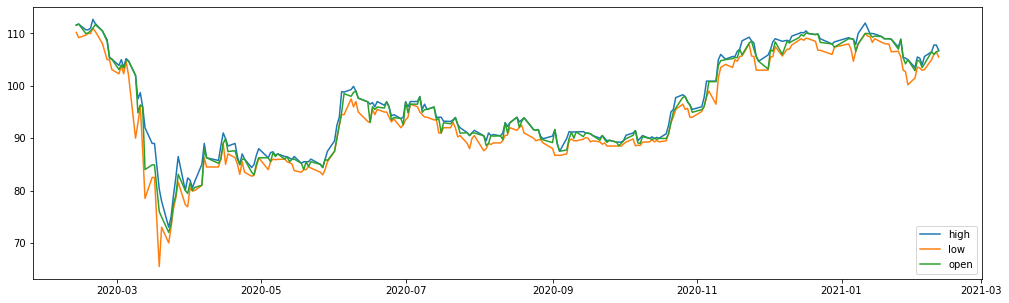

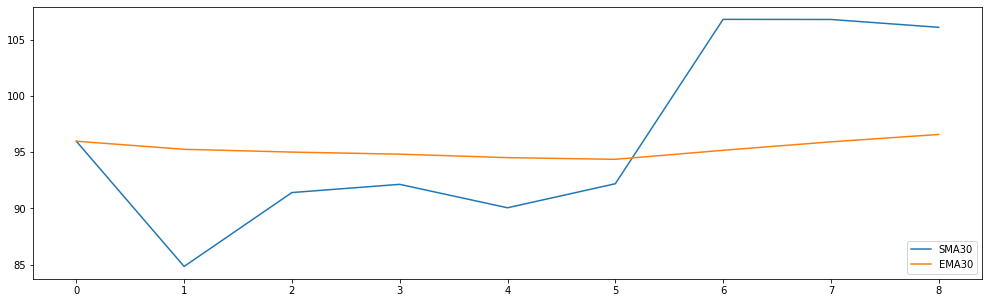

In [73]:
getInfo('FMETF','philippines', '13/2/2020', '13/2/2021', 30)

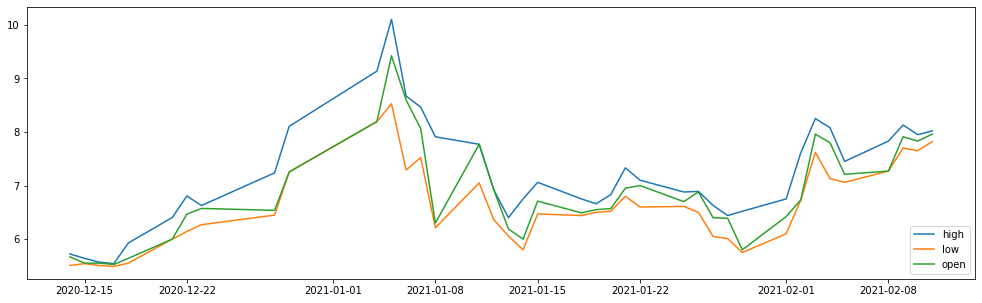

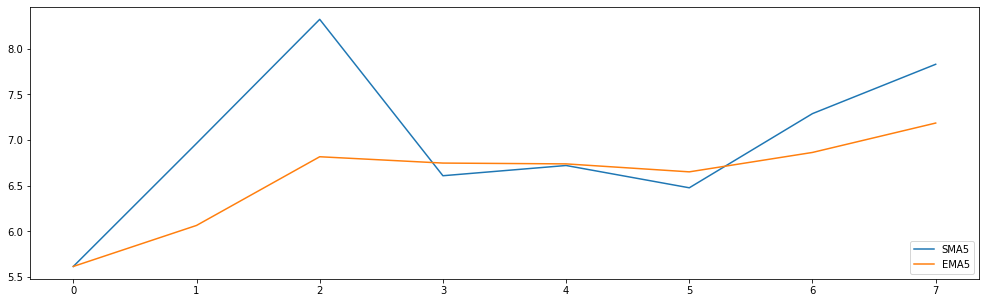

In [56]:
searchAndGetInfo('ACEN', 'Philippines', '13/12/2020', '13/2/2021', 5)

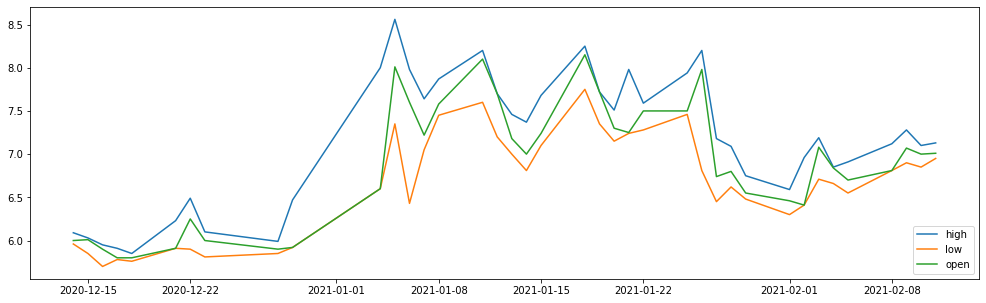

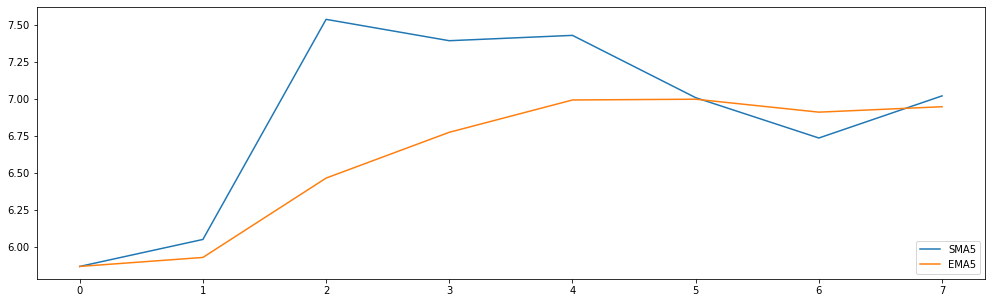

In [57]:
searchAndGetInfo('MM', 'Philippines', '13/12/2020', '13/2/2021', 5)

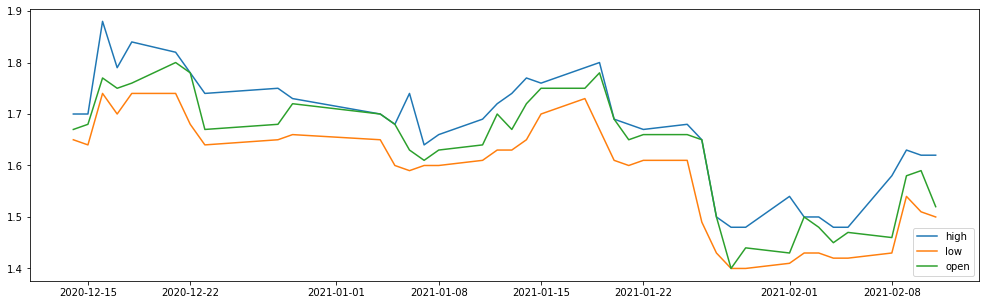

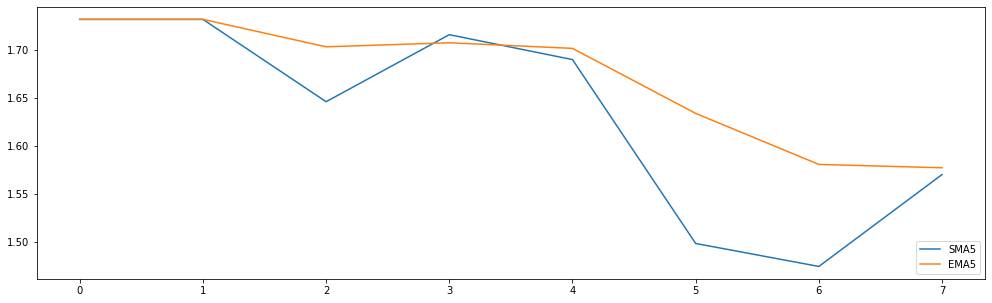

In [58]:
searchAndGetInfo('FRUIT', 'Philippines', '13/12/2020', '13/2/2021', 5)

In [11]:
##find support and resistance
##try to find a trend
####find when a trend has started and is about to change
